In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris



In [ ]:
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()
#print(breast_cancer_dataset)

data_frame = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)
data_frame.head()

data_frame["label"] = breast_cancer_dataset.target
data_frame.tail()
data_frame.shape
data_frame.info()

data_frame.isnull().sum()

data_frame.describe()

data_frame["label"].value_counts()

data_frame.groupby("label").mean()

X = data_frame.drop(columns = "label", axis = 1)
Y = data_frame["label"]

print(X)
print(Y)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

standardized_data = scaler.fit_transform(X)

print(standardized_data)

X = standardized_data
print(X)

print(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

print("Total data: ", X.shape)
print("Train data: ", X_train.shape)
print("Test data: ", X_test.shape)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (30,)),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(2, activation = "sigmoid")
])


In [ ]:
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])


In [ ]:
history = model.fit(X_train, Y_train, validation_split = 0.1, epochs = 10)

Epoch 1/10
13/13 [==============================] - 1s 19ms/step - loss: 0.7331 - accuracy: 0.5330 - val_loss: 0.5311 - val_accuracy: 0.7174
Epoch 2/10
13/13 [==============================] - 0s 4ms/step - loss: 0.4943 - accuracy: 0.8264 - val_loss: 0.3815 - val_accuracy: 0.8696
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.3676 - accuracy: 0.8973 - val_loss: 0.3013 - val_accuracy: 0.9130
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2969 - accuracy: 0.9095 - val_loss: 0.2536 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2500 - accuracy: 0.9242 - val_loss: 0.2225 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 4ms/step - loss: 0.2186 - accuracy: 0.9315 - val_loss: 0.1994 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1944 - accuracy: 0.9364 - val_loss: 0.1816 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

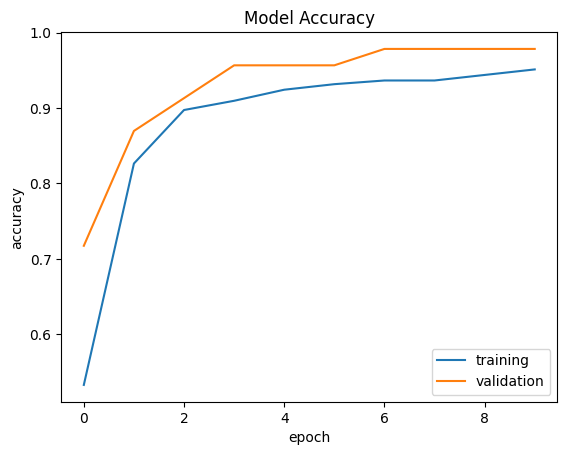

In [ ]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.legend(["training", "validation"],loc = "lower right")

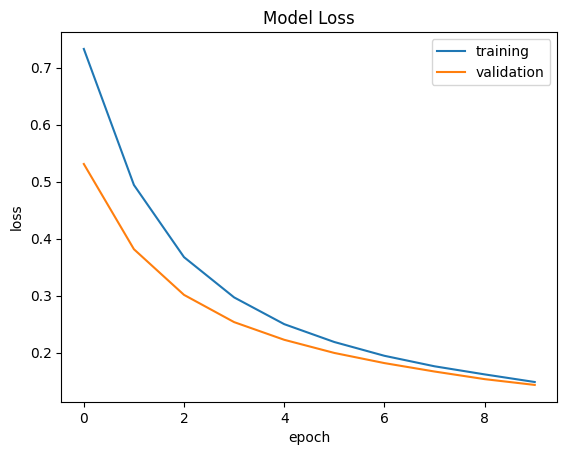

In [ ]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Model Loss")
plt.ylabel("loss")
plt.xlabel("epoch")

plt.legend(["training","validation"], loc = "upper right")

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.1302 - accuracy: 0.9649


In [ ]:
print(accuracy)

0.9649122953414917


In [ ]:
print(X_test.shape)

(114, 30)


In [ ]:
print(X_test[0])

[-0.05319351 -1.42408329 -0.06833592 -0.17260604  2.02392516 -0.1286992
  0.15317924  0.44445235  0.60014708  0.25125475  0.50863855  2.57300558
  0.60638318  0.09687179  0.99971423  0.3907719   0.52176832  2.71439431
 -0.41073446  0.65554594 -0.3415184  -1.67683887 -0.3795077  -0.3995439
  0.30822795 -0.74978636 -0.55789673 -0.19956318 -1.19838023 -0.63261684]


In [ ]:
Y_pred = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


In [ ]:
print(Y_pred.shape)

(114, 2)


In [ ]:
print(Y_pred)

[[3.67498577e-01 7.47106671e-01]
 [3.12207580e-01 4.87977594e-01]
 [9.71883386e-02 8.78852904e-01]
 [9.31283593e-01 8.37049214e-04]
 [4.31524724e-01 4.69530463e-01]
 [9.17229533e-01 1.42335473e-02]
 [3.78261149e-01 6.74439371e-01]
 [6.88096806e-02 8.76130223e-01]
 [1.75131381e-01 7.48510957e-01]
 [1.09871984e-01 8.89436901e-01]
 [3.92725587e-01 4.83727545e-01]
 [2.03743592e-01 7.23467410e-01]
 [2.42607296e-01 7.65748322e-01]
 [2.93035537e-01 6.46605372e-01]
 [1.53264344e-01 8.26259375e-01]
 [6.36732996e-01 6.04581535e-02]
 [9.27581564e-02 8.82174790e-01]
 [2.31138557e-01 8.07973981e-01]
 [2.01097131e-01 8.30525398e-01]
 [8.63872468e-01 1.86500661e-02]
 [3.34535390e-01 7.55713284e-01]
 [1.11123167e-01 8.73654306e-01]
 [1.28611848e-01 8.06459010e-01]
 [7.68750980e-02 9.16855752e-01]
 [2.33656168e-01 7.78491735e-01]
 [7.99246609e-01 9.37553570e-02]
 [3.16828460e-01 7.12203741e-01]
 [3.33663076e-01 5.40927649e-01]
 [7.86187708e-01 1.88022450e-01]
 [7.88585901e-01 7.98795149e-02]
 [1.340520

In [ ]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]


In [ ]:
print(Y_pred_labels)

[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]
